# Cluster Analysis

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use("ggplot")

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
from sklearn.metrics import davies_bouldin_score

In [2]:
all_tweets_df = pd.read_csv("bbm_tweets_oct4-9.csv")

all_tweets_df

,Unnamed: 0,Datetime,Text,Language,Username,Verified,AccountCreated,Followers,Following,MentionedUsers
0,0,2021-10-04 23:22:00+00:00,#BBMIsMyPresident2022,und,angelsantos28,False,2010-01-28 12:39:43+00:00,14,99,NaN
1,1,2021-10-04 23:21:12+00:00,Magtweet na ba ako! Di na ako makapag hintay ....,tl,01Juday,False,2021-09-10 15:48:39+00:00,148,281,NaN
2,2,2021-10-04 12:38:17+00:00,#NeverAgain to Cheating\n#YesNaYesKayBBM\n#BBM...,en,ferido_tobias,False,2021-09-26 02:39:02+00:00,9,56,NaN
3,3,2021-10-04 12:31:38+00:00,#NeverAgain to Cheating\n#YesNaYesKayBBM\n#BBM...,en,JohnVillamonte,False,2021-10-04 05:12:27+00:00,3,19,NaN
4,4,2021-10-04 11:50:01+00:00,"Kong ang kabataan ang Pag-asa ng bayan, Si Bon...",tl,goodspeedshem,False,2019-08-08 11:43:37+00:00,13,5,NaN
...,...,...,...,...,...,...,...,...,...,...
25361,25361,2021-10-08 00:02:48+00:00,Karma is a bitch kaya laban ka ng patas madumb...,tl,kotomba431C,False,2015-11-24 03:30:01+00:00,1436,1412,NaN
25362,25362,2021-10-08 00:01:25+00:00,Ay napost\n\n#BBMIsMyPresident2022 https://t.c...,tl,chachatopak,False,2010-04-03 08:38:32+00:00,21,199,NaN
25363,25363,2021-10-08 00:01:18+00:00,Damn yellow to pink 🤢 NO NO!!\nDami ga nya nag...,tl,finalmasterr,False,2016-02-14 09:16:04+00:00,280,257,NaN
25364,25364,2021-10-08 00:00:25+00:00,hypocrites\nas if hnd Yan sinasabi ng parents ...,tl,ReveCenona,False,2021-10-05 10:43:29+00:00,54,167,NaN


In [19]:
X_raw = all_tweets_df["Text"]

X_raw

0                                    #BBMIsMyPresident2022
1        Magtweet na ba ako! Di na ako makapag hintay ....
2        #NeverAgain to Cheating\n#YesNaYesKayBBM\n#BBM...
3        #NeverAgain to Cheating\n#YesNaYesKayBBM\n#BBM...
4        Kong ang kabataan ang Pag-asa ng bayan, Si Bon...
                               ...                        
25361    Karma is a bitch kaya laban ka ng patas madumb...
25362    Ay napost\n\n#BBMIsMyPresident2022 https://t.c...
25363    Damn yellow to pink 🤢 NO NO!!\nDami ga nya nag...
25364    hypocrites\nas if hnd Yan sinasabi ng parents ...
25365    Respect my choice. I go for Bong Bong Marcos. ...
Name: Text, Length: 25366, dtype: object

In [5]:
from nltk.corpus import stopwords

eng_stopwords = stopwords.words("english")

# removed # to include hashtags
special_chars = [".", ",", "!", "@", "%", "&", "*", "(", ")", "'", '""', "+", "=", "-", ";", ":", "?", "’", "'s", "...",
                 "https", "t", "co", "t co", "https t"]

all_stopwords = eng_stopwords + special_chars

all_stopwords

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [8]:
vectorizer = TfidfVectorizer(stop_words=all_stopwords)
X = vectorizer.fit_transform(X_raw)

X

<21875x25429 sparse matrix of type '<class 'numpy.float64'>'
	with 152794 stored elements in Compressed Sparse Row format>

In [9]:
X.toarray()

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [10]:
model = KMeans(n_clusters=10, init="k-means++", max_iter=100, n_init=1)
model.fit(X)

centroids = model.cluster_centers_.argsort()[:, ::-1]
terms = vectorizer.get_feature_names()

In [11]:
len(vectorizer.get_feature_names())

25429

In [12]:
def print_cluster(i):
    print("Cluster", i, ":")
    for ind in centroids[i, :10]:  # gets top 10 of each cluster (centroid)
        print("- ", terms[ind])
    
    
for i in range(10):
    print_cluster(i)

Cluster 0 :
-  bbmismypresident2022
-  buddy021919
-  bongbongmarcos
-  markmoya22
-  teambbmyouth
-  normsandrecio
-  bvrcdqpwnl
-  inquirerdotnet
-  mjbautistacpa
-  g2am6edzfh
Cluster 1 :
-  job
-  good
-  angry
-  enemies
-  making
-  morning
-  yesnayeskaybbm
-  neveragaintocheating
-  bongbongmarcos
-  bbmismypresident2022
Cluster 2 :
-  bbm
-  bbmismypresident2022
-  go
-  notosmartmagic
-  notodilawan
-  lpmagnanakaw
-  notocheating
-  lpkurakot
-  neveragaintodilawan
-  bbmismy_president2022
Cluster 3 :
-  bbmismypresident2022
-  bongbongmarcos
-  marcos
-  yes
-  abscbnnews
-  teambbmyouth
-  inquirerdotnet
-  let
-  solid
-  vote
Cluster 4 :
-  bbmikawangpresidenteko
-  bbmismypresident2022
-  bbm2022
-  bbmforpresident2022
-  bbmikawangpresidenteko2022
-  onesiniranganbbmforpresident
-  bbm
-  bbm2022tomakephilippinesgreatagain
-  bbmforpresident
-  bongbongmarcos
Cluster 5 :
-  bbmismypresident2022
-  lang
-  dilawan
-  si
-  trending
-  yung
-  leni
-  mo
-  naman
-  bbm


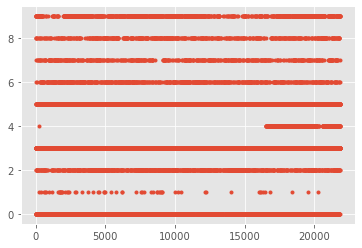

In [13]:
plt.plot(model.predict(X), ".")

In [14]:
pd.DataFrame(model.labels_).value_counts()

3    10210
5     3817
0     2591
9     1363
2     1093
4      858
6      750
8      603
7      529
1       61
dtype: int64

<AxesSubplot:xlabel='0'>

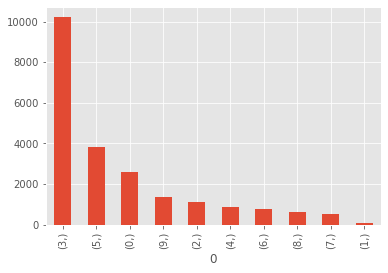

In [15]:
pd.DataFrame(model.labels_).value_counts().plot(kind="bar")